# Python sheet
By Carlos Padron padron.ca@gmail.com

In [3]:
#sankey graphs
from ipysankeywidget import SankeyWidget
import floweaver as fw

#matplotlib and seaborn
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#pandas numpy
import numpy as np
import pandas as pd

#geopandas, shapely, fiona, rasterio
import fiona
import geopandas as gpd
from shapely import wkt
import rasterio

#file management
import glob

#databases
import psycopg2

#other numeric or scientific
import networkx as nx
from sklearn import preprocessing
import random as rd
import scipy as sp

#time and date
import time

## 1 Arrays (scipy)

In [1]:
import scipy as sp

#array
my_array = sp.array(range(10,20))
print(my_array)

#negative array with negative step
my_array_neg = sp.array(range(-10,-20,-1))
print(my_array_neg)

#multiply array
arrayProduct = my_array*my_array_neg
print(arrayProduct)

#matrix or square array
squareArray = sp.array([range(10,101,10) for i in range(5)])
print(squareArray)

[10 11 12 13 14 15 16 17 18 19]
[-10 -11 -12 -13 -14 -15 -16 -17 -18 -19]
[-100 -121 -144 -169 -196 -225 -256 -289 -324 -361]
[[ 10  20  30  40  50  60  70  80  90 100]
 [ 10  20  30  40  50  60  70  80  90 100]
 [ 10  20  30  40  50  60  70  80  90 100]
 [ 10  20  30  40  50  60  70  80  90 100]
 [ 10  20  30  40  50  60  70  80  90 100]]


## 2 CSV

### 2.1 Create CVS (Pandas & Numpy)

In [2]:
import numpy as np
import pandas as pd

#create csv with numpy
x = [1,2]
y = [1,2]
array = sp.array([x,y])
np.savetxt('coord.csv',array, delimiter = ',')

#create csv with pandas
pd_coord = pd.DataFrame({'X':x,'Y':y})
pd_coord.to_csv('pd_coord.csv', index = False)

### 2.2 Read and save csv (Python, Pandas & Numpy)

In [ ]:
#load any csv and write lines to it
data = open('data.csv')
infile = csv.reader(data,delimiter = ',')
edit = csv.writer(data, delimiter = ';')
for row in extra_data:
    edit.writerow(row)
data.close()

In [9]:
#Load ‘coord.csv’, multiply all the values by 10, delete the last column and 
#resave it.

#reads csv with no header (if there is a header is going keep it as a row)
data = pd.read_csv('coord.csv', names = ["x", "y"])
data = data*2
#saved csv limiting format to three decimals
data.to_csv('coord.csv', index = False, float_format='%.3f')
data

,x,y
0,2.0,4.0
1,2.0,4.0


In [44]:
#Load ‘coord.csv’ as an array. Transform it so that X and Y are columns, 
#rather than rows [Hint: Look up the documentation on transposing an array]. 
#Add #three more random coordinates. Plot all the points for which X is greater 
#than #0.7 and Y is less than 0.3.
from numpy import genfromtxt
data = genfromtxt('coord.csv', delimiter=',')
data = np.transpose(data)
data = np.append(data,[[rd.random(),rd.random()] for i in range(3)], axis=0)
print(data[(data[:,0]>0.7) & (data[:,1]<0.3)])

[[0.97772443 0.11682463]]


### 2.3 Concatenate CSV

In [ ]:
#concatenate multiple csv
files = glob.glob('Documents/x/*/*.csv', recursive=True)
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result.to_csv('*.csv')

## Cython

In [ ]:
%load_ext Cython

#obtain la_bd centroids
centroids = la_bd["geometry"].centroid
la_bd2 = la_bd.copy()
la_bd2 = la_bd2.assign(la_geom = la_bd2["geometry"])
la_bd2 = la_bd2.assign(geometry = centroids)

#match centroids with fua areas
fua_map = fua_map.assign(fua_geom = fua_map["geometry"])
la_bd3 = gpd.sjoin(la_bd2, fua_map, how="left", op='intersects')

#creates merged columns (names and geometries) with fua if available or la if not
la_bd3 = la_bd3.assign(
    merged_nm = np.where(la_bd3["uafua16nm"].isna(), la_bd3["cmlad11nm"], la_bd3["uafua16nm"]),
    merged_geom = np.where(la_bd3["uafua16nm"].isna(), la_bd3["la_geom"], la_bd3["fua_geom"]))

## 3 Databases

### 3.1 psycopg2

In [1]:
import psycopg2
import pprint

conn = psycopg2.connect("dbname=gis user=carlos")
cursor = conn.cursor()

In [2]:
#list schemas
cursor.execute("SELECT schema_name FROM information_schema.schemata")
rows = cursor.fetchall()  
pprint.pprint(rows) 

[('pg_toast',),
 ('pg_temp_1',),
 ('pg_toast_temp_1',),
 ('pg_catalog',),
 ('public',),
 ('information_schema',),
 ('topology',)]


In [6]:
#using psycopg (works better on terminal)
cursor.execute("copy ucl.road_data (index, \"avgSpeed\", date, description, id, lat, lon, \"totalVolume\") FROM '/home/carlos/Documents/road_data.csv' DELIMITER ',' CSV HEADER")

### 3.2 psycopg2 and geopandas

In [6]:
import geopandas as gpd
%matplotlib inline

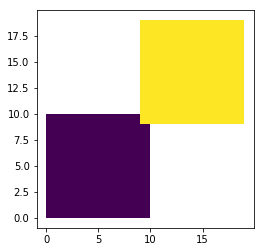

In [9]:
#create polygons
query = 'SELECT \
    ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry AS geom, \
    1 AS color \
    UNION \
    SELECT \
    ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry AS geom, \
    2 AS color'
df = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')
df.plot(column='color')

## 4 Dataframes

In [3]:
#Create a data frame with five rows and three columns. The titles of the 
#columns should be “Name”, “Age” and “Height”. They can be filled with any 
#appropriate data, but at least two people should share the same age.

d = {"Name" : pd.Series(['juan','carlos','maria','jose','ana'], index=['a', 'b', 'c', 'd', 'e']),
     "Age" : pd.Series([10,20,30,20,15], index=['a', 'b', 'c', 'd', 'e']),
     "Height" : pd.Series([rd.randint(150,180) for i in range(5)], index=['a', 'b', 'c', 'd', 'e'])}
dataFrame = pd.DataFrame(d)
print(dataFrame)

   Age  Height    Name
a   10     160    juan
b   20     159  carlos
c   30     159   maria
d   20     159    jose
e   15     158     ana


In [4]:
#Group the dataframe by age and print the mean height of each group.
grouped = dataFrame.groupby(['Age'])
print(grouped.mean())

     Height
Age        
10      160
15      158
20      159
30      159


In [ ]:
grouped = grouped.groupby(["lat", "lon", pd.Grouper(key='date', freq='15min')])
summary = grouped.mean()
summary.head()

In [25]:
#add new row
row = pd.DataFrame({"Name" : "georgia", "Age" : "20", "Height" : 165}, index=["f"])
dataFrame = pd.concat([dataFrame, row], ignore_index=True)
print(dataFrame)

  Age  Height     Name
0  10     157     juan
1  20     153   carlos
2  30     161    maria
3  20     157     jose
4  15     176      ana
5  20     165  georgia


In [ ]:
#summary table

values = df.groupby(['col1', 'col2'])['col3'].count().unstack([0])
total_by_col1 = values.sum(axis=1)
total = pd.concat([values, total_by_col1], axis = 1)
total_by_col2 = total.sum()
total = pd.concat([total, total_by_col2.to_frame().transpose()], axis = 0)
total = total.assign(perc1 = total['val 1']/df.shape[0] , perc2 = total['val 2']/df.shape[0])
total = total.rename(columns={0: 'Total by col1'})
total = total.rename(index={0: 'Total by col2'})

In [ ]:
dff1.columns.get_loc("col1")

## Dictionaries

In [7]:
#Create simple dictionary and get element by key, values and keys
dictionary = {'first':1, 'second':2}
print(dictionary['first'])
print(dictionary.values())
print(dictionary.keys())

1
dict_values([2, 1])
dict_keys(['second', 'first'])


In [23]:
#Create a dictionary where the keys are three colours (strings) and the 
#values are the number of letters in each colour.
colours = ['red', 'green', 'blue']
coloursDict = {i:len(i) for i in colours}
print(coloursDict)

{'red': 3, 'green': 5, 'blue': 4}


In [24]:
#Use a for loop to create a dictionary where the keys are the numbers from 5 
#to 10 and the values are the squares of the keys.
numDict = {i:i**2 for i in range(5,11)}
print(numDict)

{5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100}


## Flow control

In [ ]:
# double variables from a list ith double values. works also with objects
for i, x in enumerate(['first', 'second', 'third']):
    i, x
    #stop
    break
    #continues with next
    continue
    #does nothing
    pass

## Functions

In [5]:
#definining function with no return or input
def myFunctionHello():
    print("hello")
#definining function with return or input    
def myFunctionSum(x):
    return x+1

myFunctionHello()
print(myFunctionSum(1))

hello
2


## Logical

In [ ]:
if x clause:
elif:
else:

In [ ]:
#logical operators
a == b > c
<>
>=
in []
type(x) is list
(A and (not B)) or C

In [ ]:
#logical operator pandas
##show rows in usual residence missing in cmlad11cd
~RF01BEW_la["usual_residence"].isin(la_bd["cmlad11cd"]).any()

## Lists
see official documentation https://docs.python.org/3/

In [ ]:
#empty list
List=[]
#nested comprehension
List=[(x,y) for x in range(5) for y in range(5) if x<>y]    
#nested 
NestedList=[[],[]]
#add item x
List.append(x)
#add list x
List.extend(x)
#insert in position
List.insert(pos,x)
#remove first value encountered
List.remove(x)
#clear list
List.clear()
#returns position of x
List.index(x)
#count appearances of x
List.count(x)
#sort list
List.sort()
#reverse list 
List.reverse()
#remove item in position or last by default
List.pop(x)
#python counts from 0
dataType[2:]
#it also counts from -1 which is last position (reversed order)
dataType[-1]

In [6]:
#Store and print a list of all the years in your lifetime.
years = list(range(1985,2017))
print(years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [7]:
#Store and print a list of all the leap years in your lifetime.
leapYears = list(range(1988,2017,4))
print(leapYears)

[1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [10]:
#Select all the leap years between 2000 and 2010 from this list and store 
#separately.
leapYearsSelection = [i for i in leapYears if (i>=2000 and i<=2010)]
print(leapYearsSelection)

[2000, 2004, 2008]


In [12]:
#Use a for loop to print your name 10 times.
xnames = ["Carlos" for i in range(0,10)]
print(xnames)

['Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos', 'Carlos']


In [13]:
#Use a for loop (and the list you created in question 2) to print double the 
#value of each of the years in your lifetime.
xyears = [i*2 for i in years]
print(xyears)

[3970, 3972, 3974, 3976, 3978, 3980, 3982, 3984, 3986, 3988, 3990, 3992, 3994, 3996, 3998, 4000, 4002, 4004, 4006, 4008, 4010, 4012, 4014, 4016, 4018, 4020, 4022, 4024, 4026, 4028, 4030, 4032]


In [14]:
#Extend your list of leap years by adding the previous and next leap years.
leapYears.insert(0,leapYears[0]-4)
leapYears.append(leapYears[-1]+4)
print(leapYears)

[1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]


In [15]:
#Remove all years containing a zero from the list.
leapYears = [ i for i in leapYears if '0' not in str(i)]
print(leapYears)

[1984, 1988, 1992, 1996]


In [16]:
#Use a comprehension to create a list containing 15 repetitions of your name.
nameList = ['carlos' for i in range(0,15)]
print(nameList)

['carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos', 'carlos']


In [17]:
#Use a comprehension to create a list of the sums of all consecutive 
#numbers from 1 to 10 (i.e. 1+2, 2+3, …).
consecutiveSum = [i+i+1 for i in range(1,11)]
print(consecutiveSum)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


## Map

In [ ]:
#read geometry written in well-known text
from shapely.wkt import dumps, loads
geometry = [wkt.loads(i) for i in other_map["geometry"]]


#read geometry written in well-known binary or hex
from shapely.wkb import loads
geometry = [loads(i, hex=True) for i in lr_poly]

#creates geodataframe
geopandas_db = gpd.GeoDataFrame(map1, crs = {'init': 'epsg:4326'}, geometry = geometry)

In [ ]:
#print coordinate reference system
print(geopandas_db.crs)

In [ ]:
geopandas_db.to_file("sites.shp", driver = 'ESRI Shapefile')

In [ ]:
#obtain la_bd centroids
centroids = la_bd["geometry"].centroid
la_bd2 = la_bd.copy()
la_bd2 = la_bd2.assign(la_geom = la_bd2["geometry"])
la_bd2 = la_bd2.assign(geometry = centroids)

#match centroids with fua areas
fua_map = fua_map.assign(fua_geom = fua_map["geometry"])
la_bd3 = gpd.sjoin(la_bd2, fua_map, how="left", op='intersects')

#creates merged columns (names and geometries) with fua if available or la if not
la_bd3 = la_bd3.assign(
    merged_nm = np.where(la_bd3["uafua16nm"].isna(), la_bd3["cmlad11nm"], la_bd3["uafua16nm"]),
    merged_geom = np.where(la_bd3["uafua16nm"].isna(), la_bd3["la_geom"], la_bd3["fua_geom"]))

la_bd3



In [ ]:
#extract all nodes from edges
x = [j for i in edges['the_geom'].to_crs(epsg=27700) for j in i.xy[0]]
y = [j for i in edges['the_geom'].to_crs(epsg=27700) for j in i.xy[1]]

## Math

In [9]:
#Calculate the value of ((100 + 5)^3)/(4*1).
print(((100+5)**3.0)/(4.0*1))

289406.25


## Miscellaneous

In [2]:
#shebang. Required for scripts
#!/usr/bin/env python3

In [ ]:
#multiple assingmen of variables
a, b = [1, 2]
a, b = 1, 2

## PIP

TO BE RUN ON TERMINAL

#install as user
pip3 install x --user

## Plots

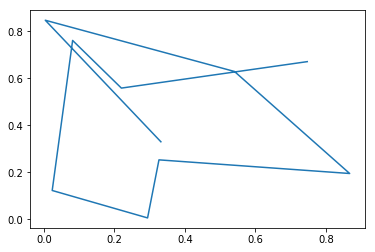

In [5]:
#Display a simple plot of X against Y.
plt.plot(x,y)
plt.show()

In [ ]:
#show points from dataframe
fig, ax = plt.subplots()
ax.plot(data2["lon"], data2["lat"], 'ro')
plt.show()
plt.close()

In [ ]:
#show all points by average speed
fig, ax = plt.subplots()
minv = 0
maxv = data2["avgSpeed"].quantile(.95)
norm = mpl.colors.Normalize(vmin =  minv, vmax = maxv)
ax.scatter(data2["lon"],
           data2["lat"],
           norm = norm,
           c = data2["avgSpeed"],
           cmap = plt.get_cmap("Reds"),
           edgecolors='none')
plt.show()
plt.close()

In [ ]:
#creates animation

#variables
date = data2["date"].sort_values().unique()
minv = 0
maxv = data2["avgSpeed"].quantile(.99)
tempData = data2
tempData["color"] = np.where(data2["avgSpeed"] < maxv, data2["avgSpeed"], maxv)
tempData["color"] = (((tempData["color"] * 1) / maxv) - 1) * (-1)

#prepares plot
fig, ax = plt.subplots()
plt.set_cmap("Reds")
norm = mpl.colors.Normalize(vmin =  minv, vmax = maxv)
scatter = ax.scatter(x = [],
                     y = [],
                     c = [],
                     cmap = plt.get_cmap("Reds"),
                     edgecolors='none',
                     animated = True)

def init():
    ax.set_xlim([data2["lon"].min(), data2["lon"].max()])
    ax.set_ylim([data2["lat"].min(), data2["lat"].max()])
    return scatter

def update(frame):
    color = [[i, 0, 0, 1] for i in data2[data2["date"] == date[frame]]["color"].as_matrix()]
    scatter.set_offsets(data2[data2["date"] == date[frame]][["lon", "lat"]].as_matrix())                                                    
    scatter.set_facecolor(color)

ani = FuncAnimation(fig, update, init_func = init, frames = len(dates))
HTML(ani.to_html5_video())

#ani = FuncAnimation(fig, update, frames = len(dates), blit=True)
#ani.save('im.mp4')
#plt.close()

## Ramdon numbers

In [2]:
import random as rd

#Use a comprehension to create a list of 10 random integers between 1 and 20.
randList = [rd.randint(1, 20) for i in range(10)]
print(randList)

[14, 8, 5, 15, 3, 3, 6, 5, 15, 11]


In [6]:
import random as rd

#Create two lists (X and Y), each containing ten random numbers between 0 
#and 1.
x = [rd.random() for i in range(10)]
y = [rd.random() for i in range(10)]
print(x)
print(y)

[0.7441479865630132, 0.47492776533632686, 0.16775698096873426, 0.9400889808193685, 0.4379318771876204, 0.47020976653318036, 0.6394298601032234, 0.05950144838288318, 0.23886718159877052, 0.8139927871474957]
[0.3744185276177284, 0.08502390360759726, 0.16155839313983467, 0.8449553114976938, 0.3629416750031814, 0.8597052334785185, 0.4817348436278982, 0.9485745387635349, 0.1674844619916872, 0.3043729965340025]


In [8]:
import random as rd

#randon uniform distribution
np.random.uniform(0, 1, (5, 3))

array([[0.54314047, 0.05049364, 0.85190423],
       [0.57134945, 0.60756088, 0.15443788],
       [0.50593406, 0.63373257, 0.98083941],
       [0.21331377, 0.26092451, 0.30646269],
       [0.0671582 , 0.28583692, 0.66597105]])

## VirtualEnv

TO BE RUN ON TERMINAL

##create virtual environment
#python3 -m venv --copies /home/carlos/Dropbox/virtualEnv/tesis/

##activate
#source /home/carlos/Dropbox/virtualEnv/tesis/bin/activate

##deactivate
#deactivate

##check path
#which python
#which pip3
#which jupyter

##install jupyter and other lib
#pip3 install jupyter
#jupyter notebook

In [ ]:
#check path, should be within virtual env
import sys
sys.path

## to reubicate